# Exploratory Data Analysis- USA Accidents Analysis.

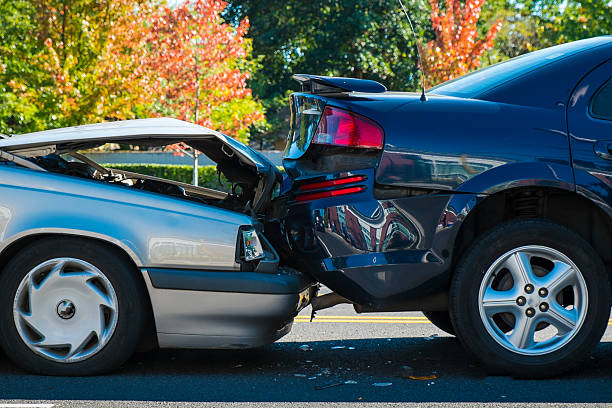

# Import Libaries for Data Analysis

In [53]:
import pandas as pd                                                  # Importing for data visualization
import numpy as np
import seaborn as sns                                                #  Importing for data visualization
import matplotlib.pyplot as plt
#------------------------------------------------------------------------------------------------------------------------------
import warnings                                                        #Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")                                      # Warnings will appear only once

# Uploading Data 
The data source has been taken from **kaggle.com** and importing the data by using **Pandas and Numby**.


In [54]:
Acc=pd.read_csv("US_Accidents_Dec21_updated.csv")

In [55]:
Acc.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


# Data Cleaning
In this section, we will clean out our data based on the information retrieved from the previous observations.

Hence, we will have to perform the following subtasks

- Checking for **missing values** and manipulating them

- Checking the **datatypes**

- Checking of the **Spelling Correction**


In [56]:
Acc.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [57]:
Acc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845342 entries, 0 to 2845341
Data columns (total 47 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Severity               int64  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Number                 float64
 11  Street                 object 
 12  Side                   object 
 13  City                   object 
 14  County                 object 
 15  State                  object 
 16  Zipcode                object 
 17  Country                object 
 18  Timezone               object 
 19  Airport_Code           object 
 20  Weather_Timestamp      object 
 21  Temperature(F)         float64
 22  Wind_Chill(F)     

In [58]:
# bool(13), float64(13), int64(1), object(20)

In [59]:
Acc.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,1.101431e+06,2.776068e+06,2.375699e+06,2.772250e+06,2.786142e+06,2.774796e+06,2.687398e+06,2.295884e+06
mean,2.137572e+00,3.624520e+01,-9.711463e+01,3.624532e+01,-9.711439e+01,7.026779e-01,8.089408e+03,6.179356e+01,5.965823e+01,6.436545e+01,2.947234e+01,9.099391e+00,7.395044e+00,7.016940e-03
std,4.787216e-01,5.363797e+00,1.831782e+01,5.363873e+00,1.831763e+01,1.560361e+00,1.836009e+04,1.862263e+01,2.116097e+01,2.287457e+01,1.045286e+00,2.717546e+00,5.527454e+00,9.348831e-02
min,1.000000e+00,2.456603e+01,-1.245481e+02,2.456601e+01,-1.245457e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.344517e+01,-1.180331e+02,3.344628e+01,-1.180333e+02,5.200000e-02,1.270000e+03,5.000000e+01,4.600000e+01,4.800000e+01,2.931000e+01,1.000000e+01,3.500000e+00,0.000000e+00
50%,2.000000e+00,3.609861e+01,-9.241808e+01,3.609799e+01,-9.241772e+01,2.440000e-01,4.007000e+03,6.400000e+01,6.300000e+01,6.700000e+01,2.982000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.016024e+01,-8.037243e+01,4.016105e+01,-8.037338e+01,7.640000e-01,9.567000e+03,7.600000e+01,7.600000e+01,8.300000e+01,3.001000e+01,1.000000e+01,1.000000e+01,0.000000e+00
max,4.000000e+00,4.900058e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,1.551860e+02,9.999997e+06,1.960000e+02,1.960000e+02,1.000000e+02,5.890000e+01,1.400000e+02,1.087000e+03,2.400000e+01


In [60]:
# Percentage of missing values in the dataset
Acc.isnull().sum().sort_values(ascending=False)/len(Acc)

Number                   6.129003e-01
Precipitation(in)        1.931079e-01
Wind_Chill(F)            1.650568e-01
Wind_Speed(mph)          5.550967e-02
Wind_Direction           2.592834e-02
Humidity(%)              2.568830e-02
Weather_Condition        2.482514e-02
Visibility(mi)           2.479350e-02
Temperature(F)           2.434646e-02
Pressure(in)             2.080593e-02
Weather_Timestamp        1.783125e-02
Airport_Code             3.356011e-03
Timezone                 1.285961e-03
Nautical_Twilight        1.007612e-03
Civil_Twilight           1.007612e-03
Sunrise_Sunset           1.007612e-03
Astronomical_Twilight    1.007612e-03
Zipcode                  4.635647e-04
City                     4.814887e-05
Street                   7.029032e-07
Country                  0.000000e+00
Junction                 0.000000e+00
Start_Time               0.000000e+00
End_Time                 0.000000e+00
Start_Lat                0.000000e+00
Turning_Loop             0.000000e+00
Traffic_Sign

In [61]:
num=Acc.isnull().sum().sort_values(ascending=False)/len(Acc)
h=num[num!=0]
h

Number                   6.129003e-01
Precipitation(in)        1.931079e-01
Wind_Chill(F)            1.650568e-01
Wind_Speed(mph)          5.550967e-02
Wind_Direction           2.592834e-02
Humidity(%)              2.568830e-02
Weather_Condition        2.482514e-02
Visibility(mi)           2.479350e-02
Temperature(F)           2.434646e-02
Pressure(in)             2.080593e-02
Weather_Timestamp        1.783125e-02
Airport_Code             3.356011e-03
Timezone                 1.285961e-03
Nautical_Twilight        1.007612e-03
Civil_Twilight           1.007612e-03
Sunrise_Sunset           1.007612e-03
Astronomical_Twilight    1.007612e-03
Zipcode                  4.635647e-04
City                     4.814887e-05
Street                   7.029032e-07
dtype: float64

<AxesSubplot:>

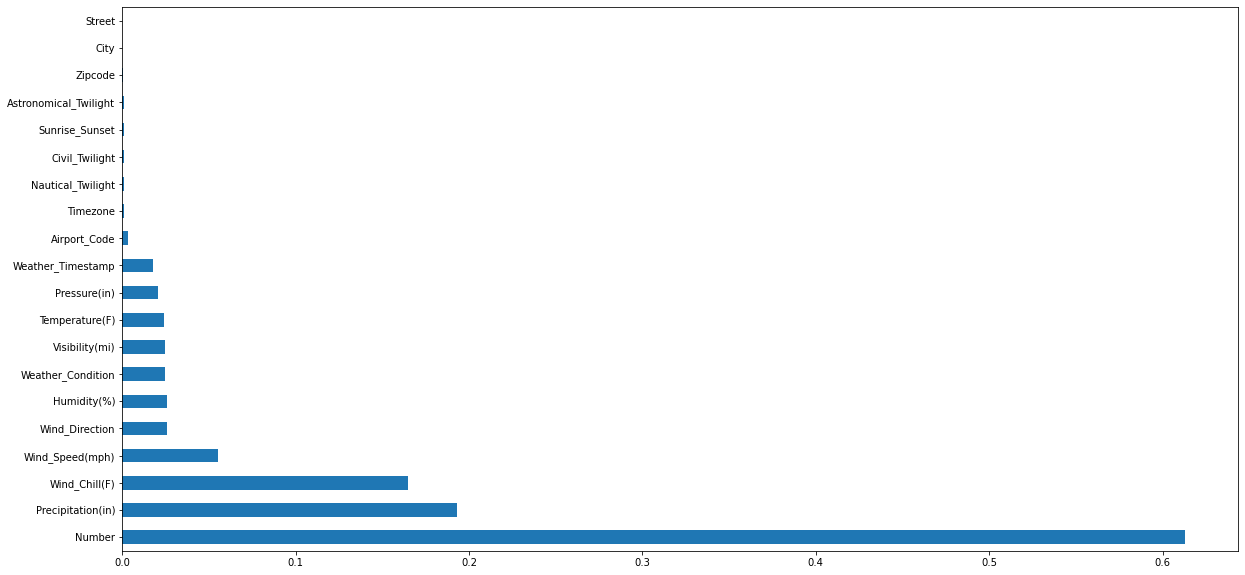

In [62]:
plt.figure(figsize=(20,10))
h.plot(kind="barh")

In [ ]:
Acc.drop(["Number"],inplace=True,axis=1)
Acc.drop(["Precipitation(in)"],inplace=True,axis=1)
Acc.drop(["Wind_Direction"],inplace=True,axis=1)
Acc.drop(["Wind_Chill(F)"],inplace=True,axis=1)


# Exploratory Data Analysis

### 1. what is the  top 5 highest accident City and State in USA?

In [63]:
TOP_5_city=Acc["City"].value_counts().sort_values(ascending=False)[:5]
Top_5_states=Acc["State"].value_counts().sort_values(ascending=False)[:5]

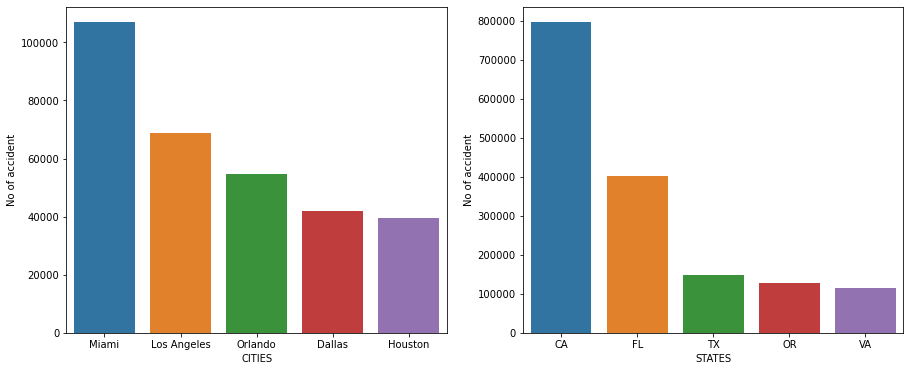

In [64]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.barplot(TOP_5_city.index,TOP_5_city.values);
plt.xlabel("CITIES")
plt.ylabel("No of accident");

plt.subplot(1,2,2)
sns.barplot(Top_5_states.index,Top_5_states.values);
plt.xlabel("STATES")
plt.ylabel("No of accident");

#### Observation:
##### Cities:
- From 2016 to 2021, the United States' most accident-prone cities are **Miami, Los Angeles, Orlando, Dallas, and Houston**.
- **Miami** has the most elevated pace of incidental with around **105000** and the second-highest city for accidents is **Los Angeles**.

##### States:
- Califonia has the huge accident area with around **800000** due to high population and poor traffic controls.
- Virgina (va) has the least number of accident with around **150000** among the states in USA.

### 2. How many frequently reported accidents are there in each city?

In [65]:
data=Acc["City"].value_counts()

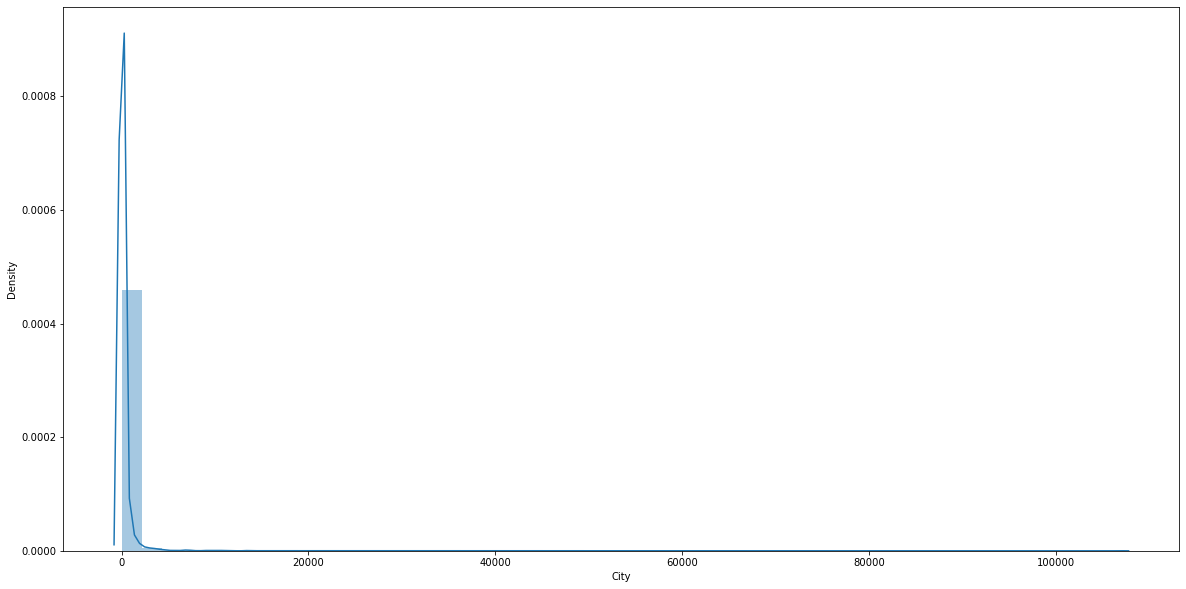

In [66]:
plt.figure(figsize=(20,10))
sns.distplot(data);

### Observation:
- The distribution is **right-skewed**, and more than **70% of accidents occur between 1 and 5000 in each city**.

### 3. Which months have the most accidents from 2016 to 2021 ?

In [67]:
Acc["Start_Time"]=pd.to_datetime(Acc["Start_Time"])

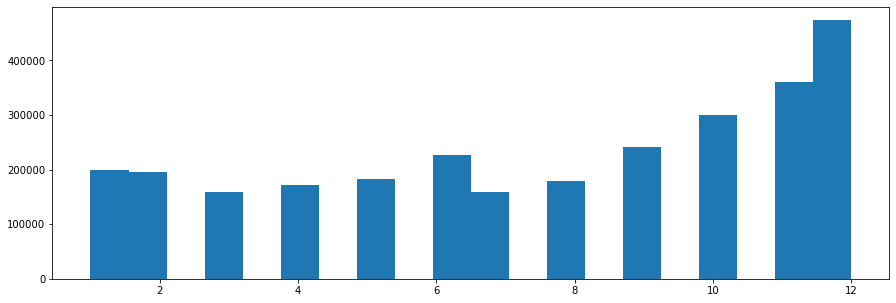

In [68]:
Acc["Month"]=Acc["Start_Time"].dt.month

Month=Acc["Month"]

plt.figure(figsize=(15,5))
plt.hist(Month,bins=20);


### Observation:

- According to a survey, **the harsh weather and business trips to celebrate Christmas and New Year's are to blame for the highest number of accidents in November and December**.
- In the following analysis, March and April have the fewest accidents, while December has the most, with about **600 000** accidents from 2016 to 2021.


### 4.Which day of the month have the most accients in 2017?

In [69]:
Acc["year"]=Acc["Start_Time"].dt.year
Acc["Day"]=Acc["Start_Time"].dt.day

j2017_data=Acc[Acc["year"]==2017]

In [70]:
j2017_data.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Month,year,Day
14819,A-14820,2,2017-01-01 00:44:41,2017-01-01 06:57:41,41.65280,-93.69785,41.649353,-93.697770,0.238,Between I-35/I-80 and US-6/Douglas Ave - Accid...,...,False,True,False,Night,Night,Night,Night,1,2017,1
14820,A-14821,2,2017-01-01 01:07:05,2017-01-01 07:07:05,30.02012,-95.82565,30.019387,-95.823781,0.123,Between Beginning of US-290 Freeway and Katy H...,...,False,False,False,Night,Night,Night,Night,1,2017,1
14821,A-14822,2,2017-01-01 01:07:05,2017-01-01 07:07:05,30.02509,-95.83735,30.020120,-95.825650,0.780,At Badtke Rd - Accident.,...,False,False,False,Night,Night,Night,Night,1,2017,1
14822,A-14823,3,2017-01-01 01:58:51,2017-01-01 07:58:51,32.78833,-97.05835,32.809220,-97.054290,1.462,Between Post and Paddock Rd and Riverside Pky ...,...,False,False,False,Night,Night,Night,Night,1,2017,1
14823,A-14824,3,2017-01-01 02:00:10,2017-01-01 08:00:10,32.76268,-96.77526,32.724300,-96.762260,2.757,Between Lamar St/Exit 283 and Overton Rd/Exit ...,...,False,False,False,Night,Night,Night,Night,1,2017,1


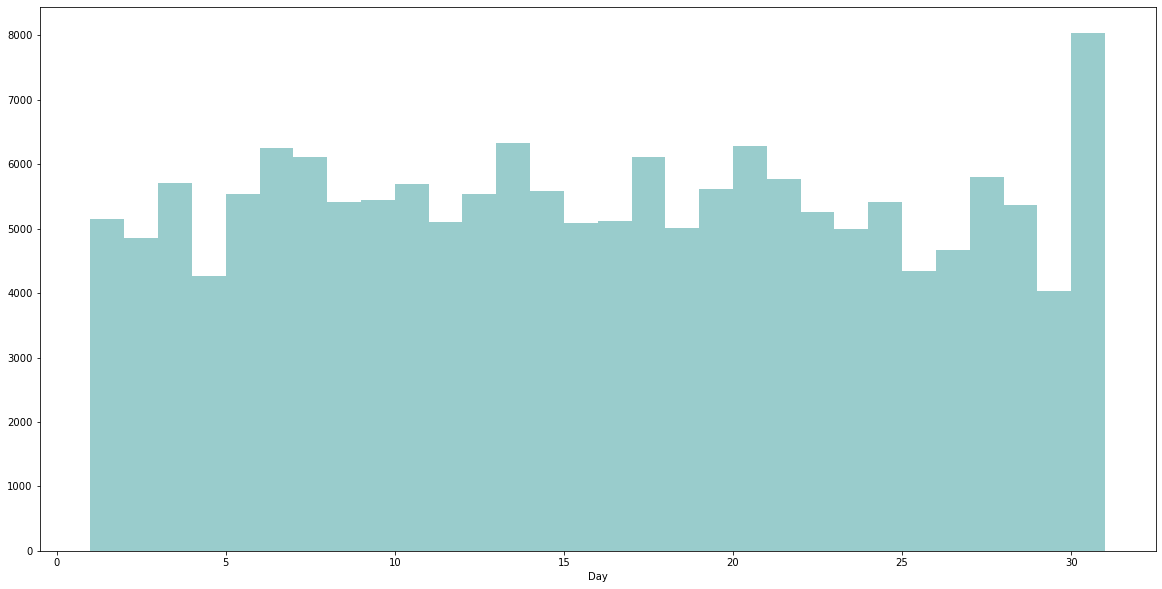

In [71]:
year_2017=j2017_data["Day"]

plt.figure(figsize=(20,10))
sns.distplot(year_2017,bins=30,kde=False,color="teal");

### Observtion:-
- The distribution shows that **the last day of the month had the highest average of 8000 accidents**, while the other days had an average of **6500** accidents.

### 5.Which weekday have the most accident in USA?

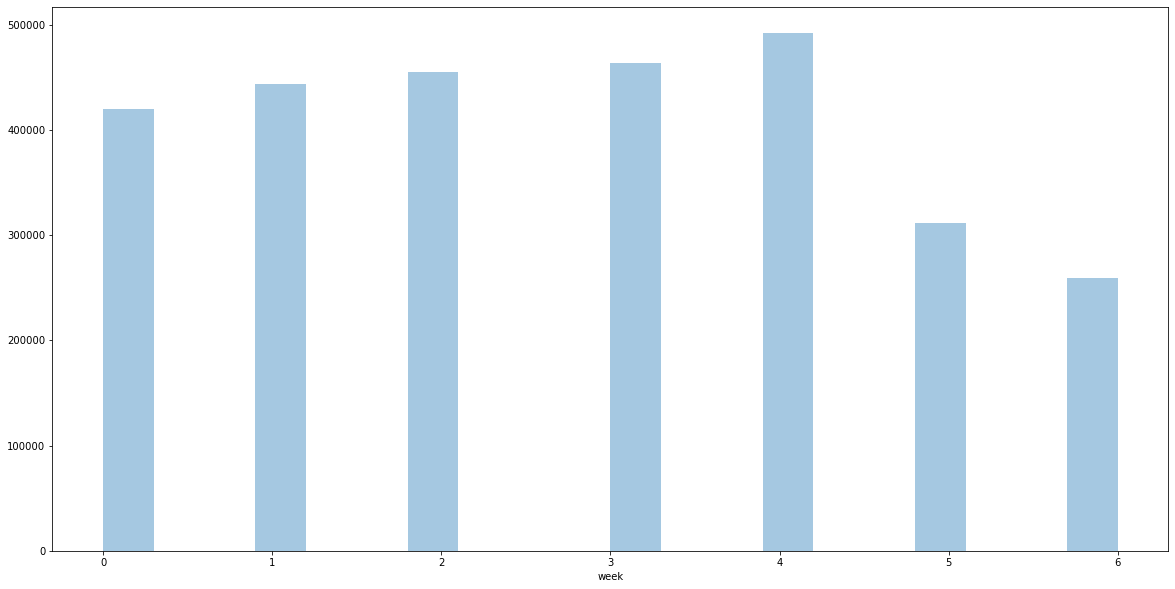

In [72]:
Acc["week"]=Acc["Start_Time"].dt.weekday

weekday=Acc["week"]

plt.figure(figsize=(20,10))
sns.distplot(weekday,bins=20,kde=False);

### Observation:-
- It demonstrates that, in the United States, the busiest days are **Monday, Tuesday, Wednesday, and Thursday**, when there are approximately **450000** accidents on average.

### 6.Which hour the most accients obtained in USA from 2016 to 2021?

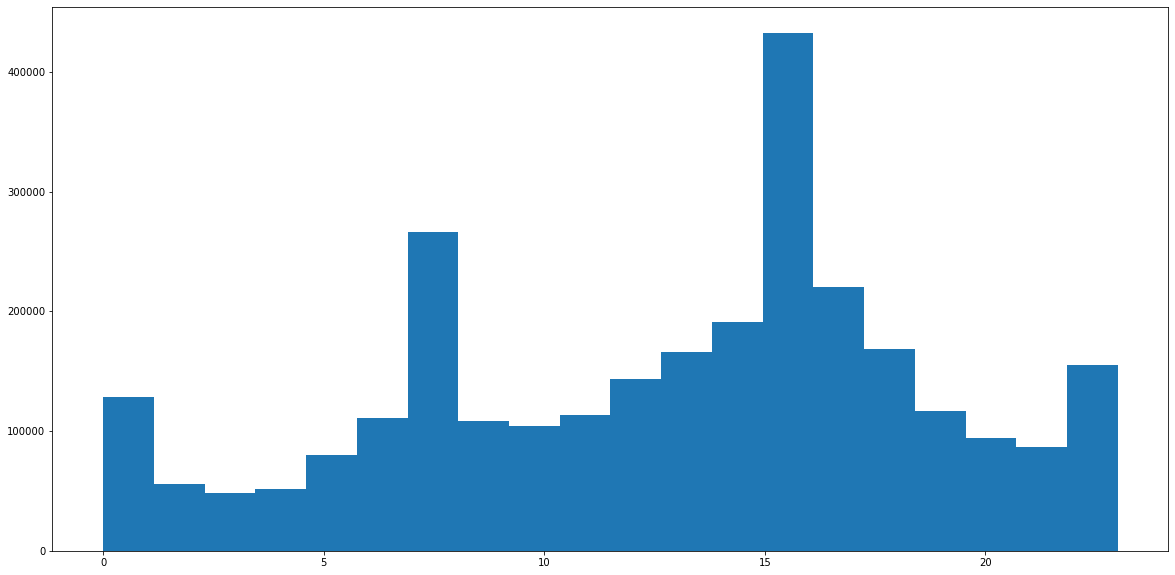

In [73]:
Acc["Hour"]=Acc["Start_Time"].dt.hour

Hour=Acc["Hour"]


plt.figure(figsize=(20,10))
plt.hist(Hour,bins=20);

### Observation:-
- Clearly demonstrates that the majority of incidents occurred in the evening between 15 and 18 p.m. and the lowest accidents occur in the morning time.

### Categorical Features

In [74]:
cat=Acc["Traffic_Signal"],Acc["Sunrise_Sunset"]

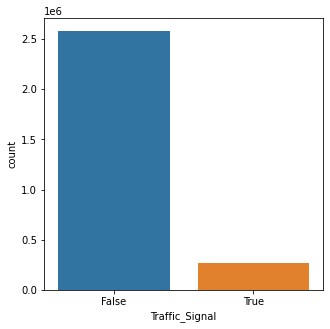

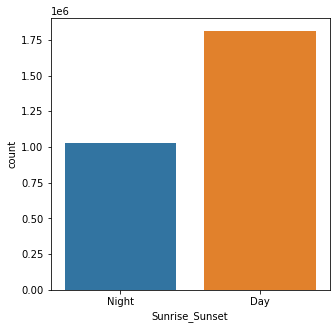

In [75]:
for h in cat:
    plt.figure(figsize=(5,5))
    sns.countplot(h);

### Observation:-
- Most of the accidents happened in Day time and due to wrong trafic signal